In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
C96hAEL = '#F9F06C'
C120hAEL = '#EBA434'
Cupcrawling = '#414042'
CwhitePupa = '#003399'
C2hAPF = '#0080FF'
C4hAPF = '#33FFFF'
C6hAPF = '#71C382'
CecadGFPnbG4 = '#404040'
CecadGFPnbG4myoVI = '#0099CC'


colors = {'ecadGFPnbG4': CecadGFPnbG4,
          'ecadGFPnbG4myoVI': CecadGFPnbG4myoVI,
          '96hAEL': C96hAEL,
          '120hAEL':C120hAEL,
          'wL3': Cupcrawling,
          '0hAPF': CwhitePupa,
          '2hAPF': C2hAPF,
          '4hAPF': C4hAPF,
          '6hAPF': C6hAPF,
          'initial': 'gray',
          'final':'#EBA434'
 }




In [29]:
devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

rois = ['outDV', 'DV']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF"]


In [30]:
import os
import pwd
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  as mpl
import pickle
import csv
from matplotlib import pyplot

username = pwd.getpwuid( os.getuid() )[0]
codeRepo = '/Users/abhijeet.krishna/Documents/PhD/WDrevisions/WDeversion_theory/'
#sys.path.insert(0, codeRepo + '/CurvedTM/')


In [31]:
dataout = '/Users/abhijeet.krishna/Documents/PhD/WDrevisions/WDeversion_theory/Simulations/analysis/plots'
os.makedirs(dataout,exist_ok=True)
import pickle

In [32]:
plt.style.use('/Users/abhijeet.krishna/Documents/PhD/WDrevisions/WDeversion_theory/src/WDeversion_theory_methods/seaborn-custom-whitegrid.mplstyle')

In [33]:
def piecewise_linear_interpolate(xs_interpolated, xs, ys, manner = 'linear', include_zero = False):
    
    #assuming that xs are sorted
    #we want to know first the index i of xs for which xs[i + 1] >= x > xs[i]
    
    if include_zero:
        xs = np.array(xs)
        ys = np.array(ys)
        xs = xs.insert(xs, 0, 0) #0 included at beginning
        ys = ys.insert(ys, 0, 0) #0 included at beginning
    
    indexes = np.searchsorted(a = xs, v = xs_interpolated, side = 'right')  #function tells you the index where the element v should go to maintain the order of a. ##side does not matter if y(x) is continuous 
    #print('indexes')
    #print(indexes)
    ys_interpolated = []
    
    if indexes.shape == 1:
        indexes = [indexes]
        
    for ctr in range(len(indexes)):
        
        i = indexes[ctr]
        x_interpolated = xs_interpolated[ctr]
        if manner == 'linear':
        	i = i-1
        if manner == 'step-backward':
        	i = i-1
        # if manner is step-forward then i remains i
        
        if (i >= len(xs) - 1) or (i < 0):
            #special boundary cases
            if x_interpolated == xs[0]:
                y_interpolated = ys[0]
                ys_interpolated.append(y_interpolated)
                continue
            elif ((manner == 'linear') or (manner == 'step-backward')) and (x_interpolated == xs[len(xs)-1]):
                y_interpolated = ys[len(xs)-1]
                ys_interpolated.append(y_interpolated)
                continue 
            elif (manner == 'step-forward') and (x_interpolated == xs[len(xs)-2]):
                y_interpolated = ys[len(xs)-2]
                ys_interpolated.append(y_interpolated)
                continue 
            elif (manner == 'step-forward') and (x_interpolated <= xs[len(xs)-1]):
                y_interpolated = ys[len(xs)-1]
                ys_interpolated.append(y_interpolated)
                continue 
            else:
                #print('cannot interpolate outside the domain of x values')
                #print(x_interpolated)
                y_interpolated = None
                ys_interpolated.append(y_interpolated)
                continue
            
        if manner == 'linear':
            slope = (ys[i + 1] - ys[i])/(xs[i + 1] - xs[i])
        elif 'step' in manner:
            slope = 0
            
        y_interpolated = ys[i] + (x_interpolated - xs[i])*slope
        ys_interpolated.append(y_interpolated)
        
    if len(ys_interpolated) == 1:
        return(ys_interpolated[0])

    return(np.array(ys_interpolated))

In [34]:
dataout = dataout+"/WT"

In [35]:
folder = "mesh_from_data_rearrangement_area_corrected"

In [40]:
filepath = '/Users/abhijeet.krishna/Documents/PhD/WDrevisions/WDeversion_theory/Simulations/data/WT/'+ folder + '/analysis/'
file = filepath + 'crosssections_interpolated_all.csv'
Model_Results = pd.read_csv(file)
#np.unique(Model_Results["nb_iterations"])

In [41]:
Model_Results

,disc,arclength,x,y,curvature,devstage,genotype,theta_max,thickness,crosssection
0,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,-58.276807,-55.038195,-16.272223,0.012821,wL3,ecadGFPnbG4,0.86620,0.1,Across_DV
1,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,-56.240179,-53.419896,-15.035672,0.012828,wL3,ecadGFPnbG4,0.86620,0.1,Across_DV
2,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,-54.203552,-51.769847,-13.841823,0.012837,wL3,ecadGFPnbG4,0.86620,0.1,Across_DV
3,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,-52.166925,-50.089159,-12.691522,0.012845,wL3,ecadGFPnbG4,0.86620,0.1,Across_DV
4,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,-50.130297,-48.378966,-11.585585,0.012852,wL3,ecadGFPnbG4,0.86620,0.1,Across_DV
...,...,...,...,...,...,...,...,...,...,...
147045,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,151.562117,64.057467,-96.724191,0.151225,4hAPF,ecadGFPnbG4,1.12606,0.1,Along_DV
147046,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,153.577840,63.920190,-96.332402,0.077457,4hAPF,ecadGFPnbG4,1.12606,0.1,Along_DV
147047,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,155.593564,63.775110,-95.865637,0.047315,4hAPF,ecadGFPnbG4,1.12606,0.1,Along_DV
147048,wd_thickness_0.1_nb_iterations_5_dt_0.01_tol_b...,157.609287,63.625995,-95.340170,0.033276,4hAPF,ecadGFPnbG4,1.12606,0.1,Along_DV


1


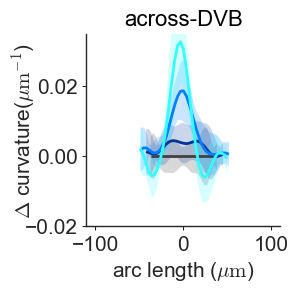

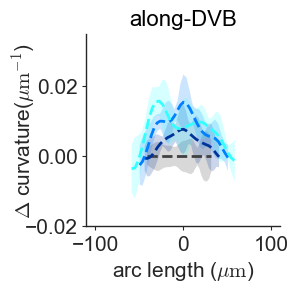

In [49]:
#for cond in ['AreaOnly', 'Elongation', 'Rearrangements', 'allWT','area_rearrangement','elongation_rearrangement','rearrangement_area_corrected']:
for cond in ['mesh_from_data_rearrangement_area_corrected']:
    ylim = (-0.02,0.035)
    if cond == 'AreaOnly':
        folder = 'area'
    elif cond == 'Elongation':
        folder = 'elongation'  
    elif cond == 'Rearrangements':
        folder = 'rearrangement'
    elif cond == 'allWT':
        folder = 'all'
    elif cond == 'mesh_from_data_rearrangement_area_corrected':
        folder = 'mesh_from_data_rearrangement_area_corrected'
        #ylim = (-0.02,0.045)
    else:
        folder = cond
        
    filepath = '/Users/abhijeet.krishna/Documents/PhD/WDrevisions/WDeversion_theory/Simulations/data/WT/'+ folder + '/analysis/'
    file = filepath + 'crosssections_interpolated_all.csv'
    Model_Results = pd.read_csv(file)

    Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
    Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'

    #filter
    Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.1]
    #theta_maxes = np.unique(Model_Results["theta_max"])
    #theta_max = theta_maxes[-1]
    #Model_Results = Model_Results.loc[Model_Results['theta_max'] == theta_max]
    nb_iterations = np.unique(Model_Results["nb_iterations"])
    nb_iterations = 1#nb_iterations[-1]
    print(nb_iterations)
    Model_Results = Model_Results.loc[Model_Results['nb_iterations'] == nb_iterations]
    


    g = Model_Results.groupby(['devstage','region','disc']).agg({'arclength':['min', 'max']}).reset_index()
    colnames = [x[0]+'_'+x[1] if x[1] != '' else x[0] for x in g.columns]
    g.columns = colnames #removing multi-indexing
    Model_Results = pd.merge(Model_Results,g)
    Model_Results.loc[Model_Results['arclength'] < 0, 'arclength_norm'] = -(Model_Results['arclength'] / Model_Results['arclength_min'])
    Model_Results.loc[Model_Results['arclength'] > 0, 'arclength_norm'] = (Model_Results['arclength'] / Model_Results['arclength_max'])
    backCalc = Model_Results.groupby(['devstage','region'])[['arclength_min','arclength_max']].agg('mean').reset_index()

    columns = ['disc', 'devstage','region','arc_interpolate','curvature_interpolate']
    InterpolatedValues = pd.DataFrame(columns=columns)
    arc_interpolate = np.arange(-1,1,0.05)

    for devstage in devstages: 
        for region in ['acrossDV','alongDV']:
            for disc in np.unique(Model_Results.loc[(Model_Results['devstage'] == devstage)&(Model_Results['region'] == region)]['disc']):

                xs = Model_Results.loc[(Model_Results['devstage'] == devstage)&(Model_Results['region'] == region)&(Model_Results['disc'] == disc)]['arclength_norm'].tolist()
                ys = Model_Results.loc[(Model_Results['devstage'] == devstage)&(Model_Results['region'] == region)&(Model_Results['disc'] == disc)]['curvature'].tolist()
                curvature_interpolate = piecewise_linear_interpolate(arc_interpolate, xs, ys, manner = 'linear', include_zero = False)
                
                for i in range(0,len(arc_interpolate)):
                    row = pd.DataFrame([[disc, devstage, region, arc_interpolate[i],curvature_interpolate[i]]], columns=columns)
                    InterpolatedValues = pd.concat([InterpolatedValues, row], ignore_index = True)
                    
    baseline = InterpolatedValues.loc[InterpolatedValues['devstage']=='wL3'].groupby(['arc_interpolate','region'])['curvature_interpolate'].agg('mean').reset_index().rename(columns={'curvature_interpolate':'baseline'})

    InterpolatedValues = pd.merge(InterpolatedValues,baseline)
    InterpolatedValues['curvature_change'] = InterpolatedValues['curvature_interpolate'] - InterpolatedValues['baseline']
    InterpolatedValues = InterpolatedValues.groupby(['devstage','region','arc_interpolate'])['curvature_change'].agg(['mean','std']).reset_index()

    InterpolatedValues = pd.merge(InterpolatedValues,backCalc)
    InterpolatedValues.loc[InterpolatedValues['arc_interpolate'] < 0, 'arclength'] = -(InterpolatedValues['arc_interpolate'] * InterpolatedValues['arclength_min'])
    InterpolatedValues.loc[InterpolatedValues['arc_interpolate'] > 0, 'arclength'] = (InterpolatedValues['arc_interpolate'] * InterpolatedValues['arclength_max'])

    for region in ['acrossDV','alongDV']:
        fig, ax = plt.subplots(figsize = (2.5,2.5))
        for devstage in ['wL3','0hAPF','2hAPF','4hAPF']:
    
            if region == 'alongDV': 
                    style = '--' 
                    title = 'along-DVB'
            else:
                style = '-'  
                title = 'across-DVB'

            toplot = InterpolatedValues.loc[(InterpolatedValues['devstage']==devstage)&(InterpolatedValues['region']==region)]
            #cropping the ends of arclengths because curvature values are qquite high there
            toplot = toplot.loc[toplot.index[5:-5]]
            ax.plot(toplot['arclength'],toplot['mean'], color = colors[devstage], linestyle = style,lw = 2)
            ax.fill_between(toplot['arclength'],y1 = toplot['mean']-toplot['std'],y2 = toplot['mean']+toplot['std'], color = colors[devstage], alpha = 0.2, edgecolor = 'none')

            ax.set_xlim(-110,110)
            ax.set_ylim(ylim)
            
            xlabel = 'arc length ' + '(' + r'$\mathrm{\mu m}$' + ')'
            ax.set_xlabel(xlabel, rotation = 'horizontal')

            ylabel = r'$\mathrm{\Delta}$' + ' curvature' + '(' + r'$\mathrm{\mu m^{-1}}$' + ')'
            ax.set_ylabel(ylabel, rotation = 'vertical', labelpad = -10) 
            ax.set_title(title)
        
            plt.savefig(dataout + 'Model_curvatureChange_arc_um_' + cond + '_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')


In [46]:
theta_max/0.8662

1.3

In [34]:
toplot

,devstage,region,arc_interpolate,mean,std,arclength_min,arclength_max,arclength
242,wL3,acrossDV,-9.000000e-01,0.000000e+00,0.007014,-49.726291,54.106008,-4.475366e+01
243,wL3,acrossDV,-8.500000e-01,0.000000e+00,0.007714,-49.726291,54.106008,-4.226735e+01
244,wL3,acrossDV,-8.000000e-01,1.040834e-18,0.006463,-49.726291,54.106008,-3.978103e+01
245,wL3,acrossDV,-7.500000e-01,6.938894e-19,0.005449,-49.726291,54.106008,-3.729472e+01
246,wL3,acrossDV,-7.000000e-01,1.734723e-18,0.006546,-49.726291,54.106008,-3.480840e+01
247,wL3,acrossDV,-6.500000e-01,6.938894e-19,0.006232,-49.726291,54.106008,-3.232209e+01
248,wL3,acrossDV,-6.000000e-01,6.938894e-19,0.004559,-49.726291,54.106008,-2.983577e+01
249,wL3,acrossDV,-5.500000e-01,3.469447e-19,0.003166,-49.726291,54.106008,-2.734946e+01
250,wL3,acrossDV,-5.000000e-01,6.938894e-19,0.003823,-49.726291,54.106008,-2.486315e+01
251,wL3,acrossDV,-4.500000e-01,-3.469447e-19,0.004572,-49.726291,54.106008,-2.237683e+01
